# Import libraries and read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import re
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Gensim
import gensim
from gensim.utils import simple_preprocess
# NLTK
import nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Read data
df = pd.read_csv('/content/drive/MyDrive/YouTube-Project/youtube-comments-reply-merge.csv')

# Preprocessing & EDA

In [ ]:
df.head()

,channel,name,comment,date,time,likes
0,Simplilearn,Simplilearn,🔥 Enroll for FREE Machine Learning Course &amp...,26-03-2021,10:21:58,4
1,Simplilearn,Garde Tanmay,can I please get the datasets my email is tanm...,20-06-2021,16:23:47,0
2,Simplilearn,Simplilearn,"Hi, thanks for watching our video. We have sen...",20-06-2021,18:33:08,0
3,Simplilearn,Nirbhay Kumar,"Great video , May I request data set at reach2...",20-06-2021,09:22:56,1
4,Simplilearn,Simplilearn,"Hi, thanks for watching our video. We have sen...",20-06-2021,18:33:13,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73457 entries, 0 to 73456
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   channel  73457 non-null  object
 1   name     73456 non-null  object
 2   comment  73457 non-null  object
 3   date     73457 non-null  object
 4   time     73457 non-null  object
 5   likes    73457 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 3.4+ MB


In [ ]:
df.describe()

,likes
count,73457.000000
mean,3.550431
std,75.290819
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9329.000000


In [ ]:
df.shape

(73457, 6)

In [ ]:
df.shape

(73457, 6)

In [ ]:
# Iterating the columns
for col in df.columns:
    print(col)

channel
name
comment
date
time
likes


# Convert comments into string in comment

In [ ]:
df['comment'] = df['comment'].apply(str)

# Check for duplicates

In [ ]:
df.drop_duplicates(subset=['comment'], keep='first', inplace=True)

# Count total number of characters and mean length of a comment

In [ ]:
count = df['comment'].str.split().str.len()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)

In [ ]:
print("Total number of words in comment:", count.sum(), "words")

Total number of words in comment: 1335414 words


In [ ]:
print("Mean number of words per comment in comment:", round(count.mean(), 2), "words")

Mean number of words per comment in comment: 21.83 words


In [ ]:
df["comment_length"] = df["comment"].str.len()
print("Total length of the dataset is:", df.comment_length.sum(), "characters")

Total length of the dataset is: 8634730 characters


In [ ]:
print("Mean Length of a comment is:", round(df.comment_length.mean(), 0), "characters")
df = df.drop(['comment_length'], axis=1)

Mean Length of a comment is: 141.0 characters


# Removing handles (@user)

In [ ]:
def remove_users(comment, pattern1, pattern2):
    r = re.findall(pattern1, comment)
    for i in r:
        comment = re.sub(i, '', comment)

    r = re.findall(pattern2, comment)
    for i in r:
        comment = re.sub(i, '', comment)
    return comment

df['tidy_comment'] = np.vectorize(remove_users)(df['comment'], "@ [\w]*", "@[\w]*")

# Normalization

In [ ]:
df['tidy_comment'] = df['tidy_comment'].str.lower()

In [ ]:
df.head()

,channel,name,comment,date,time,likes,tidy_comment
0,Simplilearn,Simplilearn,🔥 Enroll for FREE Machine Learning Course &amp...,26-03-2021,10:21:58,4,🔥 enroll for free machine learning course &amp...
1,Simplilearn,Garde Tanmay,can I please get the datasets my email is tanm...,20-06-2021,16:23:47,0,can i please get the datasets my email is tanm...
2,Simplilearn,Simplilearn,"Hi, thanks for watching our video. We have sen...",20-06-2021,18:33:08,0,"hi, thanks for watching our video. we have sen..."
3,Simplilearn,Nirbhay Kumar,"Great video , May I request data set at reach2...",20-06-2021,09:22:56,1,"great video , may i request data set at reach2..."
5,Simplilearn,andrew kimati,This is a great tutorial. Could you please sen...,18-06-2021,20:21:09,0,this is a great tutorial. could you please sen...


In [ ]:
df.columns

Index(['channel', 'name', 'comment', 'date', 'time', 'likes', 'tidy_comment'], dtype='object')

# Number of unique users

In [ ]:
df.name.nunique()

40286

# Number of unique comments

In [ ]:
df.comment.nunique()

61171

# Frequency count of commenting users

In [ ]:
df_users = df['name'].value_counts()
print(df_users.head(25))

Simplilearn                       3704
StatQuest with Josh Starmer       2020
Nicholas Renotte                   810
Ken Jee                            631
edureka!                           454
Great Learning                     373
Daniel Bourke                      244
Laurence Moroney                   240
sentdex                            235
Luis Serrano                       122
deeplizard                         104
TechWorld with Nana                 81
Craig Dennis                        75
Keith Galli                         69
Programming with Mosh               55
3Blue1Brown                         53
codebasics                          47
Global Health with Greg Martin      41
datalabcc                           38
Monika Wahi                         37
Trywell Washington                  30
Brandon Rohrer                      28
Corey Schafer                       27
freeCodeCamp.org                    21
Kushagra K                          19
Name: name, dtype: int64


# Visualization of top 15 users

In [ ]:
labels = df_users.head(15).index.values.tolist()
freq = df_users.head(15).values.tolist()
index = np.arange(len(freq))

There are 40,286 users and 61,171 comments


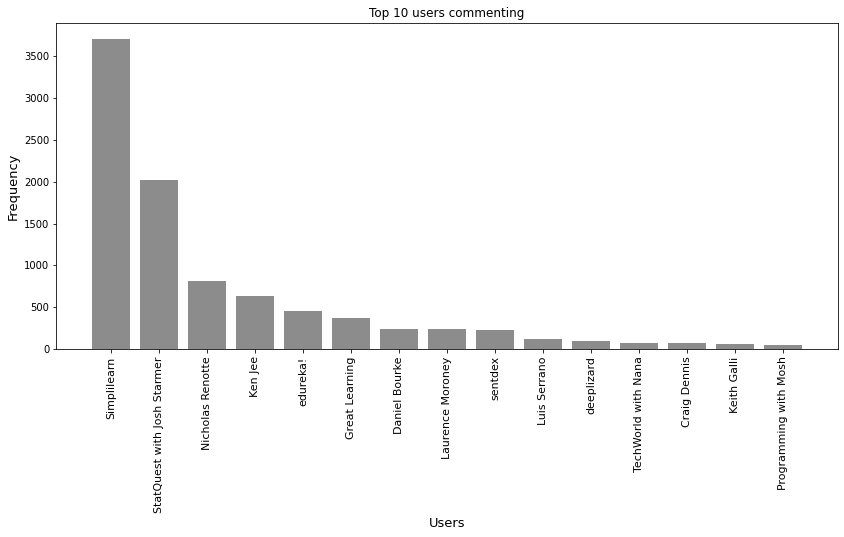

In [ ]:
print("There are 40,286 users and 61,171 comments")
plt.figure(figsize=(14,6))
plt.bar(index, freq, alpha=0.9, color= 'grey')
plt.xlabel('Users', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
# plt.xticks(index, labels, fontsize=11, rotation=90, fontweight="bold")
plt.xticks(index, labels, fontsize=11, rotation=90)
# plt.title('Top 10 users commenting', fontsize=12, fontweight="bold")
plt.title('Top 10 users commenting', fontsize=12)
plt.show()

# Remove hashtags

In [ ]:
def remove_hashtags(comment, pattern1, pattern2):
    r = re.findall(pattern1, comment)
    for i in r:
        comment = re.sub(i, '', comment)

    r = re.findall(pattern2, comment)
    for i in r:
        comment = re.sub(i, '', comment)
    return comment

df['tidy_comment'] = np.vectorize(remove_hashtags)(df['tidy_comment'], "# [\w]*", "#[\w]*")

# Remove link

In [ ]:
def remove_links(comment):
    comment_no_link = re.sub(r"http\S+", "", comment)
    return comment_no_link

df['tidy_comment'] = np.vectorize(remove_links)(df['tidy_comment'])

# Remove special characters

In [ ]:
df['tidy_comment'] = df['tidy_comment'].str.replace("[^a-zA-Z#]", " ")

# Remove short words

In [ ]:
df['tidy_comment'] = df['tidy_comment'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

# Tokenize words and clean-up punctuations

In [ ]:
def tokenize(comment):
    for word in comment:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))  # deacc=True removes punctuations

In [ ]:
df['tidy_comment_tokens'] = list(tokenize(df['tidy_comment']))

# Remove Stopwords

In [ ]:
# Prepare Stop Words
stop_words = stopwords.words('english')
stop_words.extend(['from', 'https', 'twitter', 'religions', 'pic','twitt', 'href', 'quot', 'would', 'video', 'please', 'thank', 'thanks'])
# Remove Stop Words
def remove_stopwords(comment):
    return [[word for word in simple_preprocess(str(comment)) if word not in stop_words] for comment in comment]

df['tokens_no_stop'] = remove_stopwords(df['tidy_comment_tokens'])

# Drop comments less than 3 tokens

In [ ]:
df['length'] = df['tokens_no_stop'].apply(len)
df = df.drop(df[df['length']<3].index)

df = df.drop(['length'], axis=1)
df.shape

df.reset_index(drop=True, inplace=True)

# WordCloud

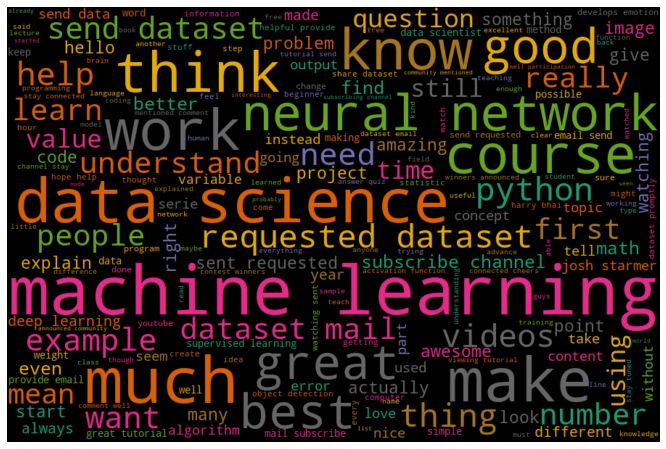

In [ ]:
# Join the comments back together
def rejoin_words(row):
    words = row['tokens_no_stop']
    joined_words = (" ".join(words))
    return joined_words

df['no_stop_joined'] = df.apply(rejoin_words, axis=1)
all_words = ' '.join([text for text in df['no_stop_joined']])

# Wordcloud
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='black',
                      max_words=200,colormap='Dark2').generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Cleaning Effects

In [ ]:
# Length of comments
df["comment_length"] = df["comment"].str.len()
df["cleaned_comment_length"] = df["no_stop_joined"].str.len()
df_lengths = df[['comment_length', 'cleaned_comment_length']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


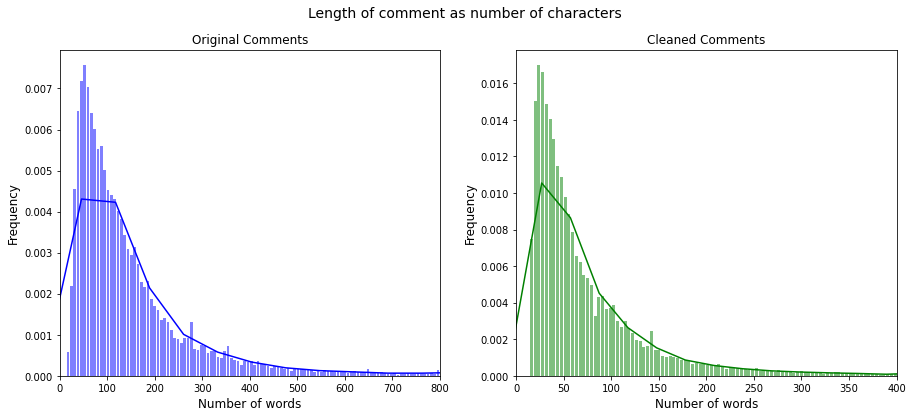

In [ ]:
x1 = df_lengths.comment_length
x2 = df_lengths.cleaned_comment_length
plt.figure(figsize=(15,6))
# plt.suptitle('Length of comment as number of characters', fontsize=14, fontweight="bold")
plt.suptitle('Length of comment as number of characters', fontsize=14)
plt.subplot(1,2,1)
sns.distplot(x1, color="blue", label="No. Words", bins=2000, hist_kws={"alpha": 0.5,"rwidth":0.8})
# plt.title("Original Comments",fontsize=12, fontweight="bold")
plt.title("Original Comments",fontsize=12)
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,800])

# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x2, color="green", label="No. Words", bins=1500, hist_kws={"alpha": 0.5, "rwidth":0.8})
# plt.title("Cleaned Comments",fontsize=12, fontweight="bold")
plt.title("Cleaned Comments",fontsize=12)
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,400])

plt.show()

In [ ]:
# Number of Words
df["comment_words"] = df['comment'].str.split().str.len()
df["cleaned_comment_words"] = df["no_stop_joined"].str.split().str.len()
df_lengths = df[['comment_words', 'cleaned_comment_words']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


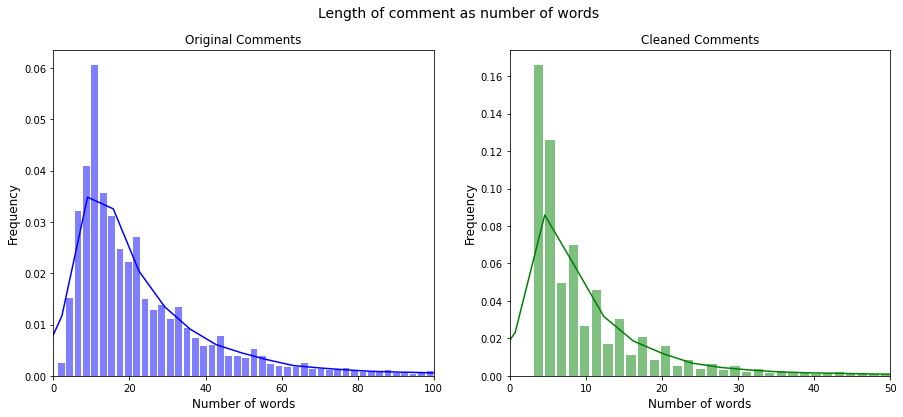

In [ ]:
x_1 = df_lengths.comment_words
x_2 = df_lengths.cleaned_comment_words
plt.figure(figsize=(15,6))
plt.suptitle('Length of comment as number of words', fontsize=14)
plt.subplot(1,2,1)
sns.distplot(x_1, color="blue", label="No. Words", bins=600, hist_kws={"alpha": 0.5,"rwidth":0.8})
# plt.title("Original Comments",fontsize=12, fontweight="bold")
plt.title("Original Comments",fontsize=12)
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,100])

# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x_2, color="Green", label="No. Words", bins=500, hist_kws={"alpha": 0.5, "rwidth":0.8})
# plt.title("Cleaned Comments",fontsize=12, fontweight="bold")
plt.title("Cleaned Comments",fontsize=12)
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,50])

plt.show()

In [ ]:
df = df.drop(['comment_length', 'cleaned_comment_length', 'comment_words', 'cleaned_comment_words'], axis=1)

# Top 10 most frequent Words

In [ ]:
word_freq = pd.Series(np.concatenate([x.split() for x in df.no_stop_joined])).value_counts()

In [ ]:
word_df = pd.Series.to_frame(word_freq)
word_df['word'] = list(word_df.index)
word_df.reset_index(drop=True, inplace=True)
word_df.columns = ['freq', 'word']

Unique words: 29222


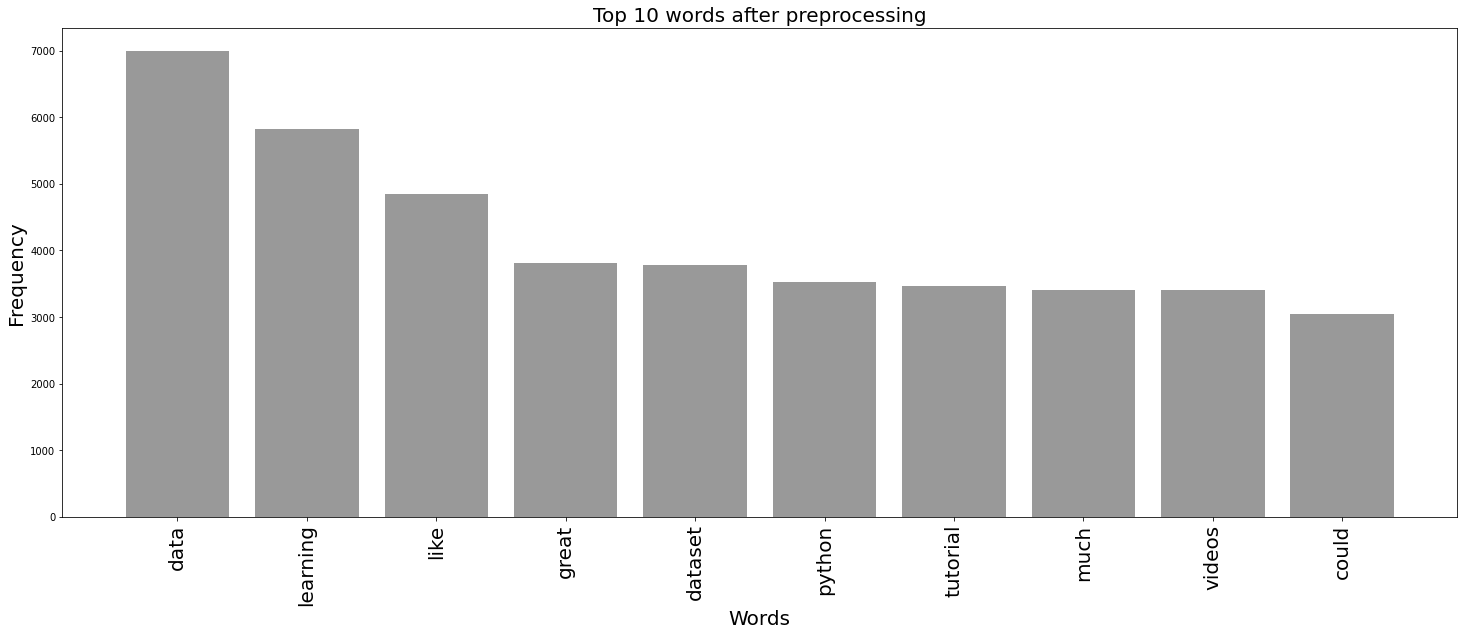

In [ ]:
label = word_df['word'].head(10)
freq = word_df['freq'].head(10)
index = np.arange(len(freq))

print("Unique words:", len(word_df))
plt.figure(figsize=(25,9))
plt.bar(index, freq, alpha=0.8, color= 'grey')
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
# plt.xticks(index, label, fontsize=20, rotation=90, fontweight="bold") 
plt.xticks(index, label, fontsize=20, rotation=90) 
# plt.title('Top 10 Words after preprocessing', fontsize=12, fontweight="bold")
plt.title('Top 10 words after preprocessing', fontsize=20)
plt.show()

# Save model 

In [ ]:
df.to_pickle('/content/drive/MyDrive/YouTube-Project/pre-processed-reply-merge.pkl')

In [ ]:
# Continue to Topic Modeling